# Regresja Liniowa
  1. Wczytanie danych
  2. Wizualizacja danych
  3. Regresja jednowymiarowa
  7. Implementacja algorytmu GradientDescent
  5. Closed-form solution
  6. Porównanie z Tensorflow

## Import bibliotek
Zaimportuj niezbędne biblioteki, takie jak *numpy, pandas, files* z *google.colab* oraz *io*

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import csv
import io

## Wczytaj plik z danymi do DataFrame
Plik, który należy załadować znajdue się tutaj [House sales train](https://szymon.bobek.re/kc_house_data_train.csv)

**Uwaga** Jest to inny plik, niż ten używany podczas ostatnich zajęć.

In [4]:
df = pd.read_csv("https://szymon.bobek.re/kc_house_data_train.csv")
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,14136,8077200360,20141112T000000,557865.0,4,2.50,3030,6813,2.0,0,...,9,3030,0,1987,0,98074,47.6296,-122.029,2310,8682
1,20699,629650030,20150312T000000,317500.0,4,2.50,2233,6025,2.0,0,...,7,2233,0,2012,0,98001,47.2599,-122.256,1544,6036
2,17835,9406510040,20150206T000000,555000.0,4,2.50,2920,24074,2.0,0,...,9,2920,0,1997,0,98038,47.3810,-122.056,2760,26023
3,5603,7224000545,20140825T000000,370000.0,4,3.00,2130,4838,1.5,0,...,7,2130,0,1930,0,98055,47.4871,-122.203,1070,4838
4,15743,9828702895,20141022T000000,700000.0,4,1.75,2420,520,1.5,0,...,7,2420,0,1900,0,98112,47.6209,-122.302,1200,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,3379,1775801340,20140606T000000,415000.0,3,1.75,1910,12596,1.0,0,...,7,1340,570,1977,0,98072,47.7399,-122.099,1550,13310
17286,5125,3741600020,20140915T000000,540000.0,3,2.25,2100,20018,1.0,0,...,8,1470,630,1948,0,98166,47.4544,-122.366,2410,17196
17287,2745,8934100125,20140829T000000,810000.0,3,2.00,2870,6360,1.5,0,...,8,1790,1080,1946,0,98115,47.6813,-122.275,2310,6466
17288,11545,5104520550,20140701T000000,357500.0,3,3.50,2080,5100,2.0,0,...,8,2080,0,2004,0,98038,47.3500,-122.005,2080,5100


## Wyświetl scatterplot ceny od sqtf_living

<Axes: xlabel='price', ylabel='sqft_living'>

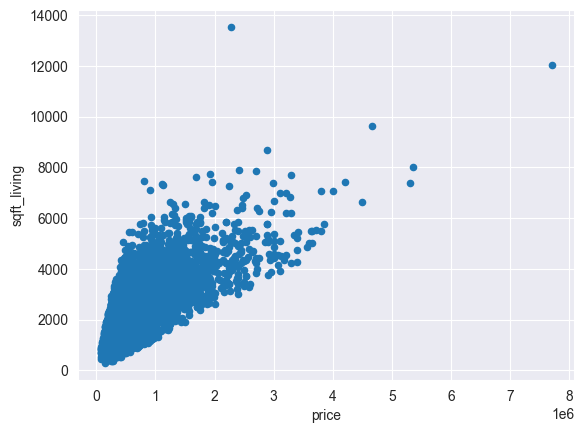

In [5]:
df.plot.scatter(x="price", y="sqft_living")

## Wyświetl scatterplot ceny od bathrooms

<Axes: xlabel='price', ylabel='bathrooms'>

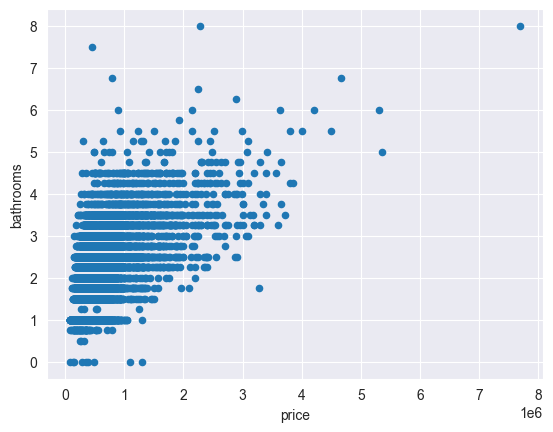

In [6]:
df.plot.scatter(x="price", y="bathrooms")

## Regresja jednowymiarowa
### Podział zbioru danych
Podziel zbiór danych na dwie części w proporcjach 66% na zbiór uczacy i 34% na zbiór testowy.
Wykorzystaj [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
X_train, X_test, y_train, y_test = train_test_split(df['bathrooms'], df['price'],test_size=0.34, random_state=0)

Tr = pd.DataFrame(data={"bathrooms": X_train, "price": y_train})
Test = pd.DataFrame(data={"bathrooms":X_test, "price":y_test})


### Wersja scikit-learn

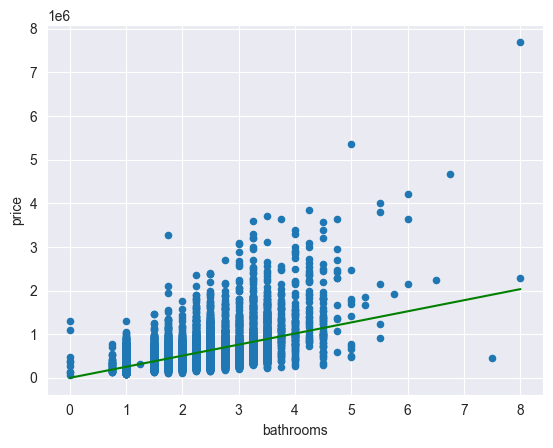

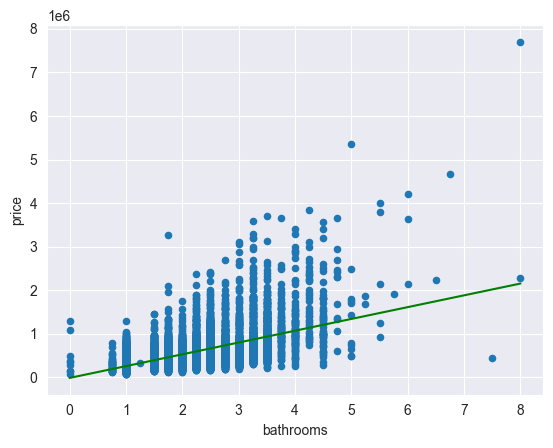

In [53]:
from sklearn import linear_model
import matplotlib.pyplot as plt


# Poniżej dwie wersje algorytmu, przetestuj obie i na końcu porównaj wyniki
# Zobacz, że w pierwszej wersji nie podajemy praktycznie żadnych parametrów

learning_rate = 0.01

regr = linear_model.LinearRegression()
regr2 = linear_model.SGDRegressor(learning_rate='constant', eta0=learning_rate)

# Naucz model wykorzystując zbiór treningowy
regr.fit(Tr['bathrooms'].values.reshape(-1,1), Tr['price'].values)
regr2.fit(Tr['bathrooms'].values.reshape(-1,1), Tr['price'].values)

theta_1 = regr.coef_[0]
theta_1_2 = regr2.coef_[0]
theta_0 = regr.intercept_
theta_0_2 = regr2.intercept_

# Poniże kod do wizualizacji. Przerrób go na funkcję,
# tak aby można go było wykorzystać w dalszych ćwiczeniach
def visualize(xName,yName,theta0,theta1,data):
    ax=data.plot.scatter(x=xName,y=yName)
    num = len(df)
    start = df[xName].min()
    end = df[xName].max()
    x = np.linspace(start,end,num)
    # x = data[xName]
    y = theta1*x+theta0
    ax.plot(x,y,color='green')
visualize("bathrooms","price",theta_0,theta_1,Tr)
visualize("bathrooms","price",theta_0_2,theta_1_2,Tr)

#### Wykorzystaj funkcję [predict](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) na zbiorze testowym, żeby wyznaczyć ceny szacowane przez model.

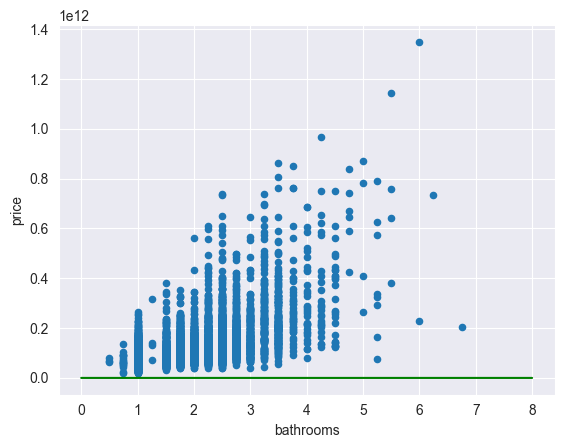

In [55]:
y_pred = regr.predict(Test['price'].values.reshape(-1,1))
predicteddf = pd.DataFrame(data={"bathrooms":Test['bathrooms'], "price":y_pred})
theta_1_3 = regr.coef_[0]
theta_0_3 = regr.intercept_
# newdf["price"] = newData
visualize("bathrooms","price",theta_0_3,theta_1_3,predicteddf)
# r2_score = model.score(x, y)
# print(f"R-squared value: {r2_score}")

#### Wykorzystj funkcję [mean_squared_error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) oraz [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) żeby oszacować błąd predykcji na zbiorze testowym

In [35]:
mean_squared_error(y_test,y_pred)
r2_score(y_test,y_pred)

-207898825945.41425

### Wersja tensorFlow
Podczas zajęć będziemy używać Keras, będącej wysokopoziomowym interfejsem do TensorFlow.
Żeby móc korzystac z Keras, należy go zainstalować. Wykonaj poniższy kod

In [36]:
# https://keras.io/
!pip install -q keras
from keras.layers import Dense
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD
import tensorflow as tf

In [ ]:
# Tworzymy model. Wszystko w TF i Keras to tak naprawdę sieć neuronowa.
# Ale... sieć neuronowa to tylko kombinacja liniowa wejść i wag -- to samo co regresja liniowa
model = Sequential([
        Dense(1, activation='linear', input_shape=(1,))
    ])

# Optymalizator wykorzystywany w Keras, to w naszym przypadku Stochastic Gradient Descent
# Spróbuj różne wartości lr (learning rate) i epochs.
# Odpowiedz na pytanie "co się dzieje????""
learning_rate = 0.01

opti=SGD(lr=learning_rate, momentum=0.0)



model.compile(loss='mse', optimizer=opti)
model.fit(x=Tr['sqft_living'], y=Tr['price'], batch_size=1, epochs=10, shuffle=False)

#### Zwizualizuj model analogicznie do przypadku z scikit

In [ ]:
w=model.get_weights()
theta_1 = w[0][0][0]
theta_0 =[1][0]


#### Wykorzystaj funkcję [predict](https://keras.io/models/model/#methods) na zbiorze testowym, żeby wyznaczyć ceny szacowane przez model.

#### Wykorzystj funkcję [mean_squared_error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) żeby oszacować błąd predykcji na zbiorze testowym

## Porównaj wyniki dla scikit i Keras da różnych zestawów cech
Pamietaj żeby korzystać z zbioru testowego. Do porównania używaj funkcji `mean_squared_error` z poprzednich ćwiczeń

## Implementacja algorytmu Gradient Descent (dodatkowe punkty)
Poniżej przedstawiony został szkielet dwóch funkcji odpowiedzialnych za realizację algorytmu Gradient descent.
Uzupełnij implementację korzystajac z materiałów z wykładu.
**Pamietaj, że w przypadku rozwiązania macierzowego, musisz dodać do zbioru cech X sztuczną cechę wypełnioną 1-kami, przez którą mnożony będzie wyraz wolny theta_0**

In [ ]:
def cost_function(X, y, theta):
    """
    cost_function(X, y, theta) oblicza koszt J(theta)

    @param X: macierz z elementami uczącymi nxm
    @param y: wartości rzeczywiste ze zbioru danych m,1
    @param theta: wektor współczynników 1,n
    """
    ## number of training examples
    m = len(y)

    J= None ## Twój kod tutaj, zgodnie ze wzorem podanym na stronie lab

    return J


In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Wykonuje algorytm gradient descent na danych podanych jako parametr.


    @param X: macierz z elementami uczącymi nxm
    @param y: wartości rzeczywiste ze zbioru danych m,1
    @param theta: wektor współczynników 1,n
    @param alpha: współczynnik uczenia, skalar
    @param iterations: ilość iteracji po których algorytm ma zakończyć działanie
    """
    cost_history = [0] * iterations

    for iteration in range(iterations):

        h_x = ## Twój kod tutaj, zgodnie ze wzorem podanym na stronie lab/wykładzie
        gradient = ## Twój kod tutaj, zgodnie ze wzorem podanym na stronie lab/wykładzie
        new_theta = ## Twój kod tutaj, zgodnie ze wzorem podanym na stronie lab/wykładzie

        theta = new_theta
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost


    return theta, cost_history

### Porównanie działania algorytmu powyżej z pakietem scikit i TensorFlow
Dokonaj porównania działania wersji zaimplementowanej przez Ciebei z poprzednimi wersjami.
  1. **Spróbuj różnych atrubutów, ich kombinacji, itp.**
  2. **Postaraj się zbudować jak najlepszy model (3 dodatkowe punkty dla najlepszego modelu w grupie)** Można pracować w grupach, ale punkty dzielą sie wówczas przez ilość osób w grupie
  3. Przetestuj swój model na danych znajdujących się tutaj: [House sales test](https://szymon.bobek.re/kc_house_data_train.csv). **Uwaga** Nie ruszaj tego zbioru aż do samego końca. Finalny zbiór testowy jest używany tylko raz -- aby sprawdzić jakość modelu. Po takim teście nie poprawiamy więcej modelu. Dlaczego?

## Closed form solution
Rozwiąż problem regresji liniowej wykorzystując `closed form solution`
  1. Porównaj wyniki z metodami gradientowymi
  2. Porównaj czas z metodami gradientowymi
  3. Czy trzeba normalizować cechy w przypadku tego podejścia?